# Mapping Police Violence

## Reading Point data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


%matplotlib notebook

PID_BC_Table = pd.read_csv('https://raw.githubusercontent.com/ubc-library-rc/Geocoding-Web-Mapping-with-Python/master/Python_Notebooks/data/PID_BC_Geocoded.csv')
PID_BC_Table.head()

,date,INDEX,id_victim,first_name,last_name,middle_name,age,gender,race,prov,...,KCC_posts,ID,Temp_Date,summary,ds_rank,Type,latitude,longitude,geocoding_Notes,geocoding_attempt
0,2016-04-21,846,0112_V1,Shirley,Williams,Beatrice,77.0,Female,Indigenous,BC,...,214_KCC,276_KCC,2016.004,NaN,NaN,Police Killing,54.880351,-126.208233,NaN,Morrison St. Granisle BC
1,2016-04-21,847,0112_V2,Jovan,Williams,Unspecified,39.0,Male,Indigenous,BC,...,214_KCC,277_KCC,2016.004,NaN,NaN,Police Killing,54.880351,-126.208233,NaN,Morrison St. Granisle BC
2,2016-06-14,850,0115_V1,Craig,Ford,Andrew,49.0,Male,White,BC,...,"234_KCC,1001_KCC",278_KCC,2016.006,NaN,NaN,Police Killing,49.203804,-123.995263,NaN,3600 block Country Club Drive Nanaimo BC
3,2016-06-24,854,854_KCC,Jocelyn,George,Nynah Marsha,18.0,Female,Indigenous,BC,...,247_KCC,16_KCC,2016.006,NaN,NaN,Police Involved Death,49.234367,-124.805652,NaN,Port Alberni BC
4,2016-08-18,861,0122_V1,Nicolas,Jeppesen,Allan,29.0,Male,White,BC,...,275_KCC,392_KCC,2016.008,NaN,NaN,Police Killing,54.510374,-128.596095,NaN,4720 Haugland Ave. Terrace BC


## Convert to a geodataframe

<IPython.core.display.Javascript object>


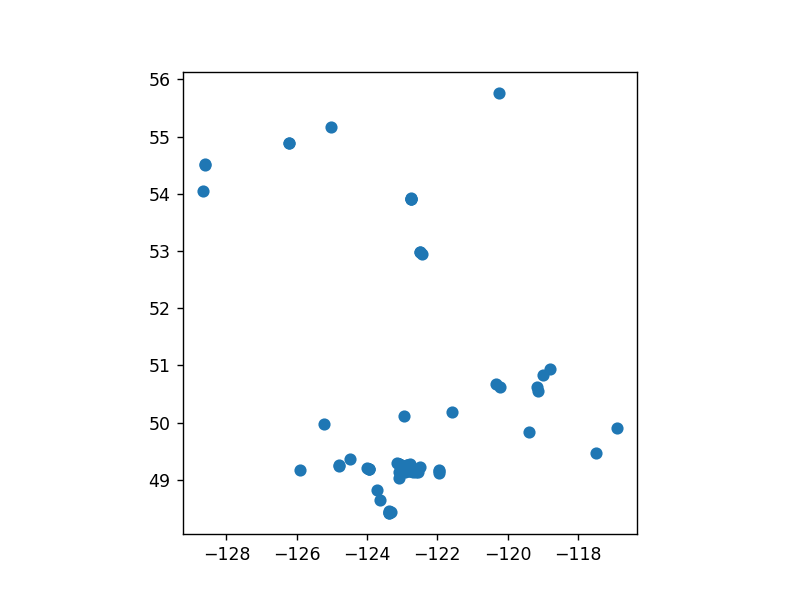

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
PID_BC = gpd.GeoDataFrame(
                    PID_BC_Table,
                    geometry=gpd.points_from_xy(PID_BC_Table.longitude, PID_BC_Table.latitude),
                    crs='WGS1984'
                        )

PID_BC.plot()
PID_BC.crs

## Read the Census Data, Re-project the points


<IPython.core.display.Javascript object>


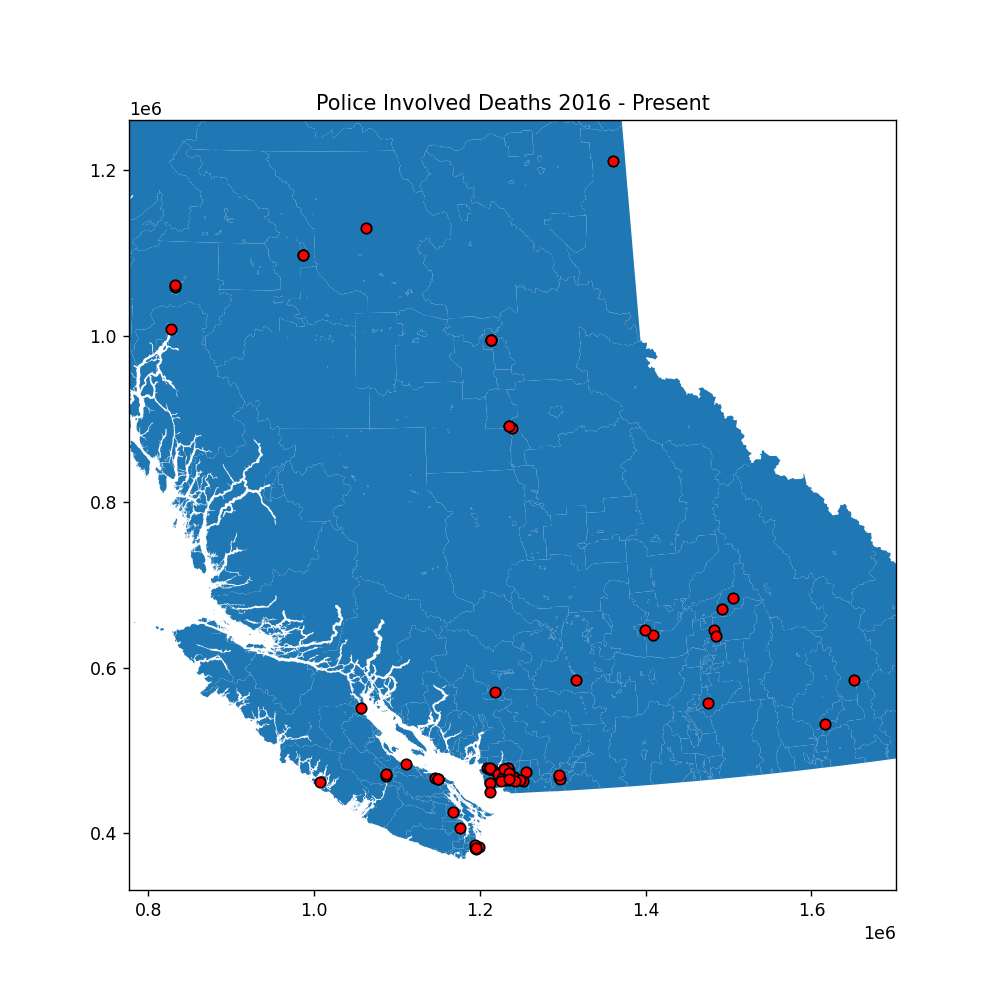

Text(0.5, 1.0, 'Police Involved Deaths 2016 - Present')

In [8]:
# BC_Sub_Div = gpd.read_file('data/Census/SimplyAnalytics_Shapefiles_2021-11-07_04_12_18_e28bde0952164f8aa648e288cab05f1b.shp')
# BC_Sub_Div=BC_Sub_Div.to_crs('EPSG:3005')

BC_Sub_Div = gpd.read_file("data/Outputs/BC_Sub_Div.json", driver = "GeoJSON")

BC_Sub_Div.crs

PID_BC = PID_BC.to_crs(BC_Sub_Div.crs)

fig,ax=plt.subplots(figsize=(8,8))
BC_Sub_Div.plot(ax=ax)
PID_BC.plot(ax=ax,color='r',edgecolor='k')


ax.set_ylim(PID_BC.geometry.y.min()-5e4,PID_BC.geometry.y.max()+5e4)
ax.set_xlim(PID_BC.geometry.x.min()-5e4,PID_BC.geometry.x.max()+5e4)
ax.set_title('Police Involved Deaths 2016 - Present')

# Vector Overlay


Lets import a points layer for some locations in BC and walk through a handful of vector overlay methods.


## Spatial Joins

We can use a [spatial join](https://geopandas.org/gallery/spatial_joins.html) to merge attributes between two layers based on location

<IPython.core.display.Javascript object>


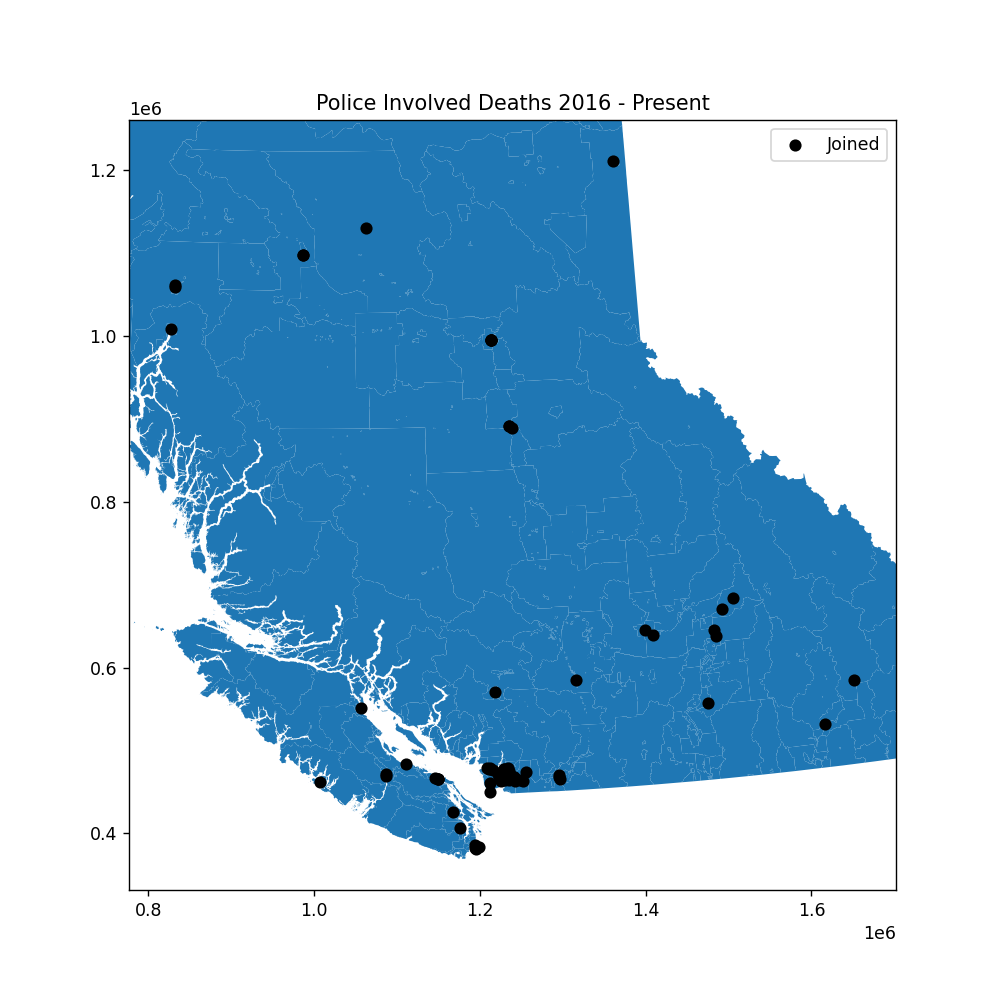

Not Joined:  0


C:\Users\User\.conda\envs\geo-env\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


,date,INDEX,id_victim,first_name,last_name,middle_name,age,gender,race,prov,...,index_right,spatial_id,name_right,Indigenous Identity,Population,Visible Minority,Indigenous_Pct,Pop_Density,Community Type,Community_Type
0,2016-04-21,846,0112_V1,Shirley,Williams,Beatrice,77.0,Female,Indigenous,BC,...,655,5951032,"Granisle, BC (CSD)",13.0,294.0,29.0,4.0,3.631532,Rural,Rural
1,2016-04-21,847,0112_V2,Jovan,Williams,Unspecified,39.0,Male,Indigenous,BC,...,655,5951032,"Granisle, BC (CSD)",13.0,294.0,29.0,4.0,3.631532,Rural,Rural
2,2016-06-14,850,0115_V1,Craig,Ford,Andrew,49.0,Male,White,BC,...,235,5921007,"Nanaimo, BC (CSD)",7683.0,101513.0,10175.0,8.0,1095.346060,None,Large Urban Center
3,2016-06-24,854,854_KCC,Jocelyn,George,Nynah Marsha,18.0,Female,Indigenous,BC,...,250,5923008,"Port Alberni, BC (CSD)",3614.0,19018.0,1091.0,19.0,939.164924,None,Small Poulation Center
4,2016-08-18,861,0122_V1,Nicolas,Jeppesen,Allan,29.0,Male,White,BC,...,612,5949011,"Terrace, BC (CSD)",4761.0,12342.0,946.0,39.0,208.910779,Rural,Rural


In [9]:
fig,ax=plt.subplots(figsize=(8,8))

# Changin how to "right" will significantly increase the runtime
# and duplicate each province multiple times (once for each incident within it)
Test_Join = gpd.sjoin(PID_BC, BC_Sub_Div, how="left") 


BC_Sub_Div.plot(ax=ax)
## See if there are any locations "outside" the provincial boundaries
Test_Join.loc[Test_Join['name_right'].isnull()==False].plot(ax=ax,color='k',label='Joined')
Test_Join.loc[Test_Join['name_right'].isnull()].plot(ax=ax,color='r',label='Not Joined')

ax.legend()

Out = Test_Join.loc[Test_Join['name_right'].isnull()]

ax.set_ylim(PID_BC.geometry.y.min()-5e4,PID_BC.geometry.y.max()+5e4)
ax.set_xlim(PID_BC.geometry.x.min()-5e4,PID_BC.geometry.x.max()+5e4)
ax.set_title('Police Involved Deaths 2016 - Present')

print('Not Joined: ',Test_Join.loc[Test_Join['name_right'].isnull()].count()['INDEX'])

Test_Join.head()

## Point In Polygon Analysis

The spatial join method is useful in some cases, but for others, it produces a lot of redundancy.  If your goal is to calculate the number of points per polygon, we can do a point in polygon analysis using the [.within()](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.within.html#geopandas.GeoSeries.within) method. 

In [10]:
BC_Sub_Div['Deaths'] = 0.0
for i,row in BC_Sub_Div.iterrows():
#     print(i)
    pip = PID_BC.within(row['geometry'])
#     print(pip)
    if pip.sum()>0:
        BC_Sub_Div.loc[BC_Sub_Div.index==i,'Deaths']+=pip.sum()
print(BC_Sub_Div['Deaths'].describe())

count    737.000000
mean       0.094980
std        0.504533
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        7.000000
Name: Deaths, dtype: float64


<IPython.core.display.Javascript object>


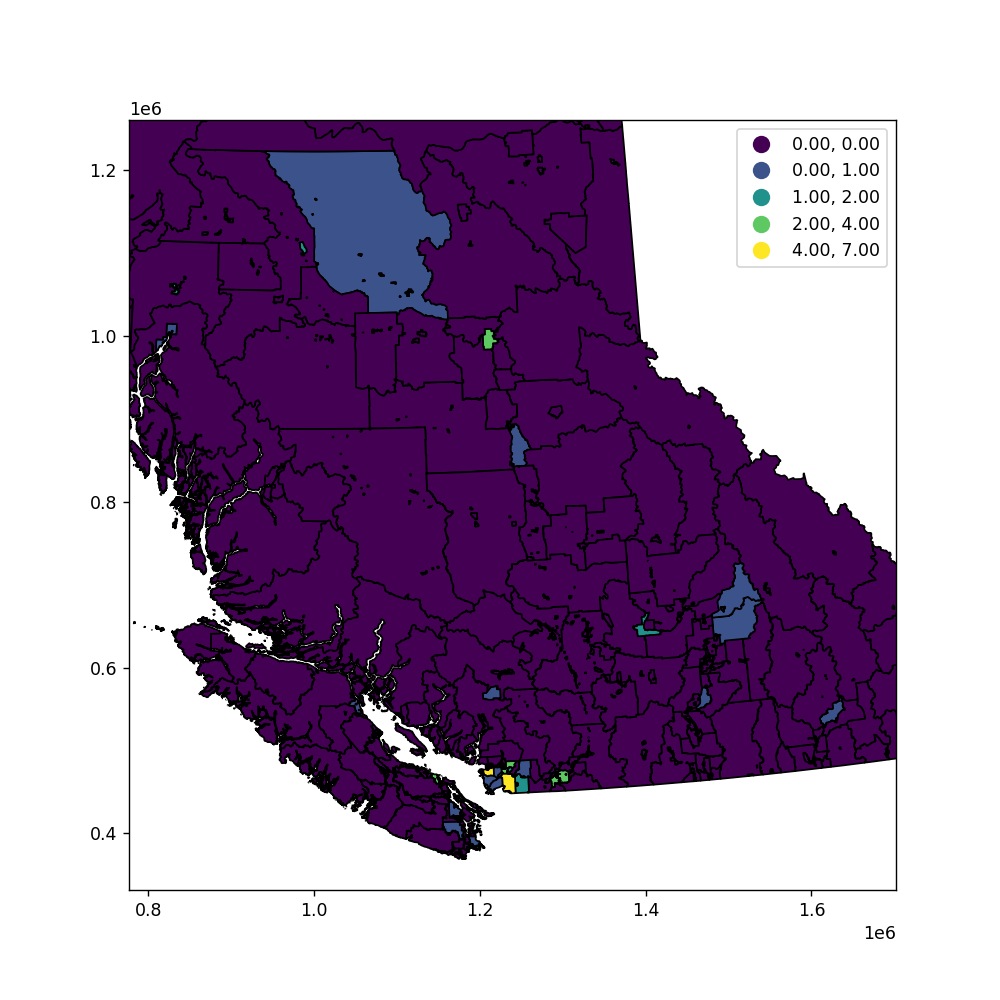

(776693.5463433585, 1701983.4971115806)

In [11]:
fig,ax=plt.subplots(figsize=(8,8))
BC_Sub_Div.plot(column='Deaths',ax=ax,legend=True,scheme="User_Defined", 
         classification_kwds=dict(bins=[0,1,2,4,
             BC_Sub_Div['Deaths'].max()]),
                    edgecolor='k')

ax.set_ylim(PID_BC.geometry.y.min()-5e4,PID_BC.geometry.y.max()+5e4)
ax.set_xlim(PID_BC.geometry.x.min()-5e4,PID_BC.geometry.x.max()+5e4)

# BC_Sub_Div_Clip.to_file('data/BC_Sub_Divisions.shp')


## Kernel Density

0.0 0.004535922778091973 1.182944775406105e-06 1.0


<IPython.core.display.Javascript object>


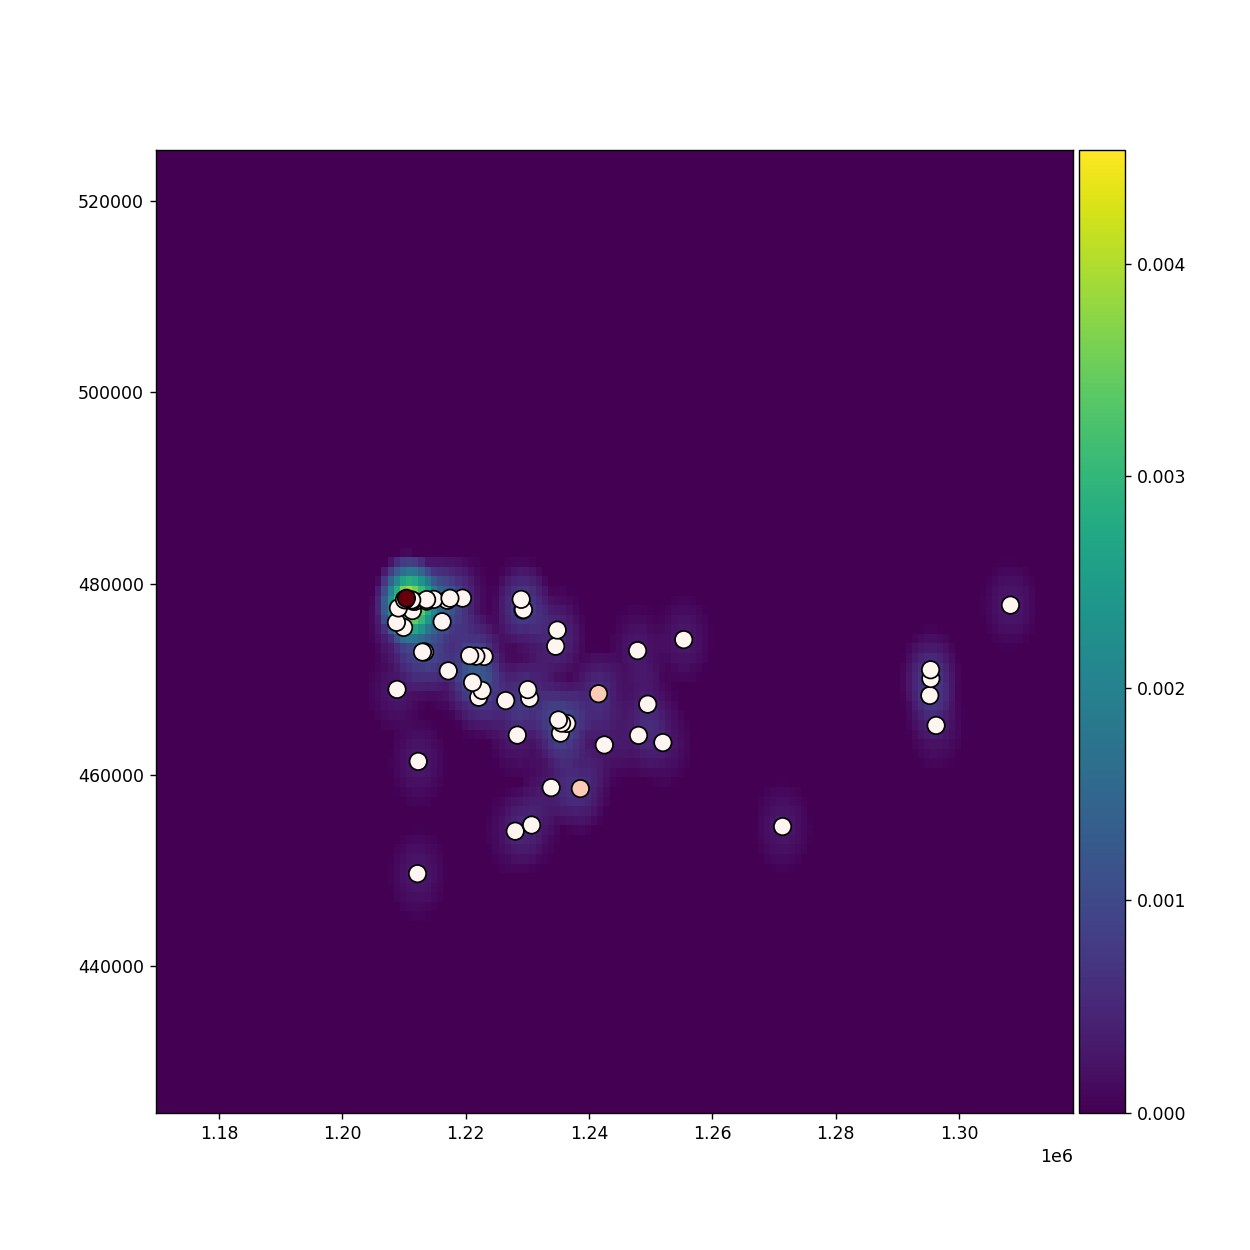

In [55]:
from sklearn.neighbors import KernelDensity
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import rasterio as rio
from rasterio.plot import show

def kde2D(x, y, bandwidth, cell_size=1e3, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""
    # Transform ipnut points to x,y pairs
    xy_train  = np.vstack([y, x]).T
    # Fit the kernel density model
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    """Construct the Output Image"""
    # Our "Null" hypothesis is a uniform 2D distribution - create a 2D grid
    # Subtract/Add the cell size to the min/max the intervals are fully inclusive of the feature space
    x_ax = np.arange(x.min()-cell_size,x.max()+cell_size,cell_size)
    y_ax = np.arange(y.min()-cell_size,y.max()+cell_size,cell_size)
    xx, yy = np.meshgrid(x_ax,y_ax)
    
    # Transform the grid points to x,y pairs
    xy_test = (np.vstack([yy.ravel(), xx.ravel()]).T)
    
    # score_samples() returns the log-likelihood of the samples
    # convert units to the cell size
    z = np.exp(kde_skl.score_samples(xy_test))*cell_size**2
    z = z/z.sum()
    return xx, yy, np.reshape(z, xx.shape)

PID_Table = pd.read_csv('https://raw.githubusercontent.com/Police-Involved-Deaths-CA/Data/main/MostRecentUpdate/Police_Killings_Locations.csv')
PID = gpd.GeoDataFrame(
        PID_Table,
        geometry=gpd.points_from_xy(PID_Table.longitude, PID_Table.latitude),
        crs='WGS1984'
            )
PID_BC = PID.loc[PID['prov']=='BC'].to_crs('EPSG:3005')

x = PID_BC.geometry.x.values
y = PID_BC.geometry.y.values

xx, yy, zz = kde2D(x, y,
                   5e3,# 5km band width
                   cell_size=1e3, #1km cell size
                   kernel='linear')

print(zz.min(),zz.max(),zz.mean(),(zz).sum())

# zz = (zz - zz.mean())/zz.std()

# print(zz.min(),zz.max(),zz.mean())

fig,ax=plt.subplots(figsize=(10,10))
cb = ax.pcolormesh(xx, yy, zz,shading='auto')

G = PID_BC.groupby(['latitude','longitude']).first()[['geometry','address_intersection','city_town']]
G['count']=PID_BC.groupby(['latitude','longitude']).count()['INDEX']

ax.scatter(G.geometry.x, G.geometry.y, s=100,edgecolor='k',c=G['count'], facecolor='k',cmap='Reds')#,legend=True)
# ax.legend()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(cb, cax=cax)


830831.1571533335 380247.4026558375 1737831.1571533335 1310247.4026558376
| 974.22, 0.00, 830831.16|
| 0.00,-1024.23, 1310247.40|
| 0.00, 0.00, 1.00|


<IPython.core.display.Javascript object>


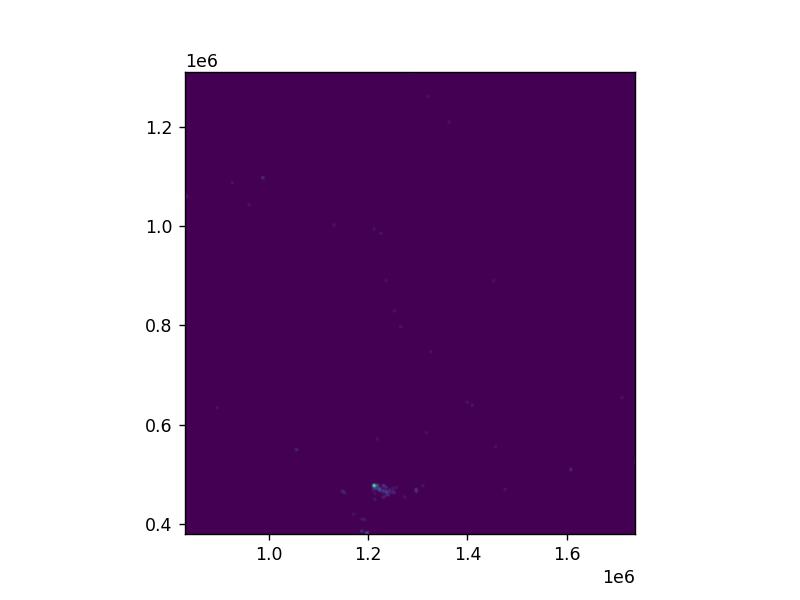

In [49]:

import rasterio as rio
from rasterio.plot import show
trans = rio.transform.from_bounds(xx.min(), yy.min(), xx.max(), yy.max(), int(xx.shape[0]), int(yy.shape[1]))

print(xx.min(), yy.min(), xx.max(), yy.max())
print(trans)

with rio.open('example.tif', 'w',
                  dtype=rio.float32,
                  count=1,
                  compress='lzw',
                  width=int(xx.shape[0]),
                  height=int(yy.shape[1]),
                  transform=trans) as dst:
    dst.write(np.flip(zz,axis=0).astype(rio.float32), 1)
fig,ax=plt.subplots()
with rio.open('example.tif','r') as Test:
    show(Test,ax=ax)
    array=Test.read()[0]
    

In [22]:
array.shape
# from rasterstats import zonal_stats

(908, 931)

In [27]:
for i,row in BC_Sub_Div.iterrows():
    ZS = zonal_stats(row.geometry, array, affine=trans, stats=['min', 'max', 'mean', 'median', 'majority'])
    print(ZS[0]['max'])

None
None
None
None
None
0.0
0.0
3.3147426470314656e-10
0.0
1.2616398811088336e-12
0.0
0.0
3.0341926193777624e-10
0.0
None
None
0.0
3.0418917384977817e-10
None
0.0
0.0
0.0
0.0
0.0
0.0
0.0
None
0.0
0.0
0.0
0.0
0.0
0.0
5.681075054830842e-10
0.0
0.0
0.0
1.5190740332293728e-10
5.105711409214564e-10
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.979957600124372e-11
0.0
0.0
0.0
0.0
0.0
0.0
2.411344179886754e-10
0.0
0.0
3.1806235423204043e-10
0.0
7.020197046723904e-24
7.020197046723904e-24
0.0
0.0
0.0
0.0
0.0
7.020197046723904e-24
7.020197046723904e-24
7.020197046723904e-24
1.568988272637739e-10
0.0
4.26020032572674e-24
0.0
0.0
0.0
0.0
0.0
0.0
7.020197046723904e-24
8.285913621897123e-10
0.0
2.975374113756146e-10
1.6768329780258995e-10
2.6661591337462376e-11
7.060010909221148e-11
4.945037782033701e-11
3.032464002128421e-10
7.020197046723904e-24
7.020197046723904e-24
1.4426645988940834e-10
0.0
0.0
0.0
0.0
0.0
None
None
0.0
None
0.0
0.0
None
None
None
4.590794966397027e-10
5.684447912379653e-10
4.25587787233